# Digit Recognizer on MNIST with a Simple Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype("float32") / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype("float32") / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7593 - loss: 0.7797 - val_accuracy: 0.9487 - val_loss: 0.1753
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9511 - loss: 0.1690 - val_accuracy: 0.9675 - val_loss: 0.1174
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9659 - loss: 0.1128 - val_accuracy: 0.9737 - val_loss: 0.0922
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9761 - loss: 0.0776 - val_accuracy: 0.9723 - val_loss: 0.0961
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9815 - loss: 0.0633 - val_accuracy: 0.9777 - val_loss: 0.0799
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.0502 - val_accuracy: 0.9762 - val_loss: 0.0854
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9874 - loss: 0.0427 - val_accuracy: 0.9767 - val_loss: 0.0829
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9901 - loss: 0.0343 - val_accuracy: 0.

# Testing with external data

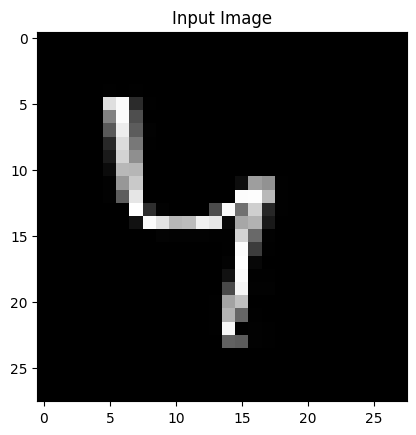

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Digit: 4


In [36]:

# Predict on a new image
img = image.load_img("img3.png", color_mode="grayscale", target_size=(28, 28))
img_array = image.img_to_array(img)
img_array = 255 - img_array   # Invert if background is white
img_array = img_array.reshape(1, 784) / 255.0

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("Input Image")
plt.show()

prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)
print("Predicted Digit:", predicted_digit)